In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from skimage.metrics import peak_signal_noise_ratio as compare_psnr

In [2]:
target = 'gaussian'

In [16]:
results = []
for trial in os.listdir('denoise/'):
    if trial.split('_')[0] == target:
        if 'restart' in trial:
            results.append(trial)        
results.sort()
results


['gaussian_0#0.1_None_None_random_restart_0.0125_06-30-2021 13:44']

In [17]:
def load_trained(path):
    path = os.path.join('denoise', path)
    residual_curve = np.load(os.path.join(path, 'residual_curve.npy'))
    psnr_curve = np.load(os.path.join(path, 'psnr_curve.npy'))
    
    noise = np.load(os.path.join(path, 'noise.npy'))
    noisy = np.load(os.path.join(path, 'noisy.npy'))
    original = np.load(os.path.join(path, 'original.npy'))
    
    base_noisy = np.load(os.path.join(path, 'base_noisy.npy'))
    base_original = np.load(os.path.join(path, 'base_original.npy'))
    
    recovered_cps = [str(x) for x in Path(path).glob("**/recovered_*.npy")]
    recovered_cps.sort()
    base_cps = [str(x) for x in Path(path).glob("**/base_*.npy") if 'noisy' not in str(x) and 'original' not in str(x)]
    base_cps.sort()
    
    return noise, noisy, original, base_noisy, base_original, recovered_cps, base_cps, residual_curve, psnr_curve


def l2norm(batch_data):
    return np.sqrt((batch_data ** 2).reshape(len(batch_data), -1).sum(1))

noise_scale=0.1, gamma=restart, basenorm_original=[122.341255 124.06469  123.88505  125.033676], basenorm_noisy=[227.0336  223.65367 227.7353  227.0497 ]


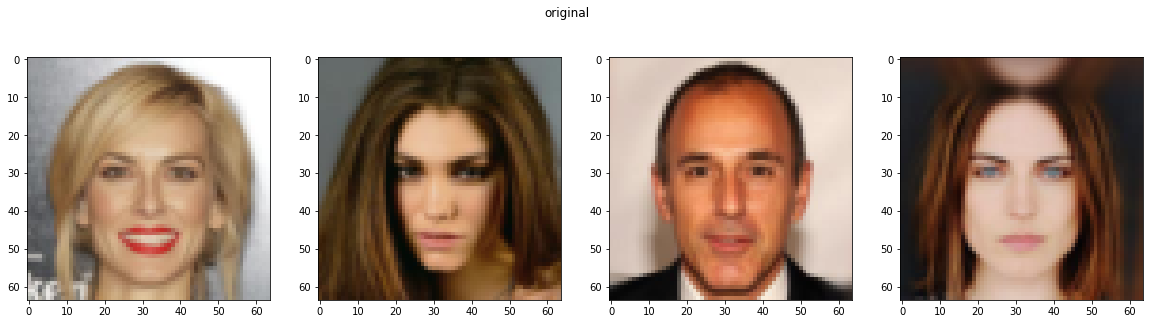

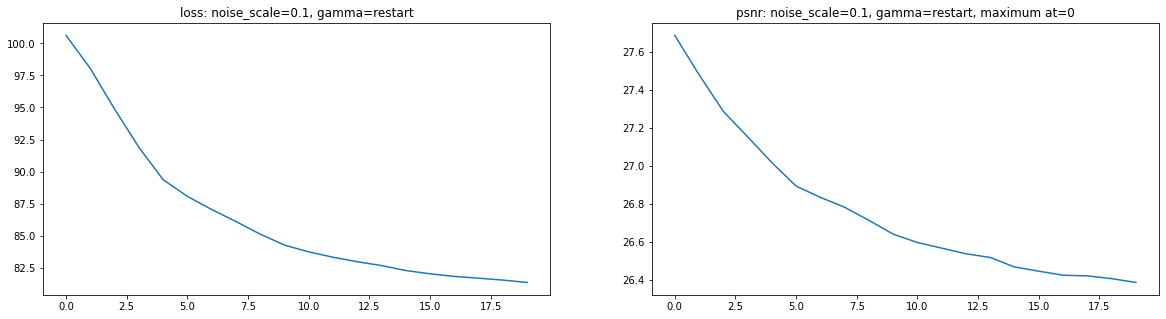

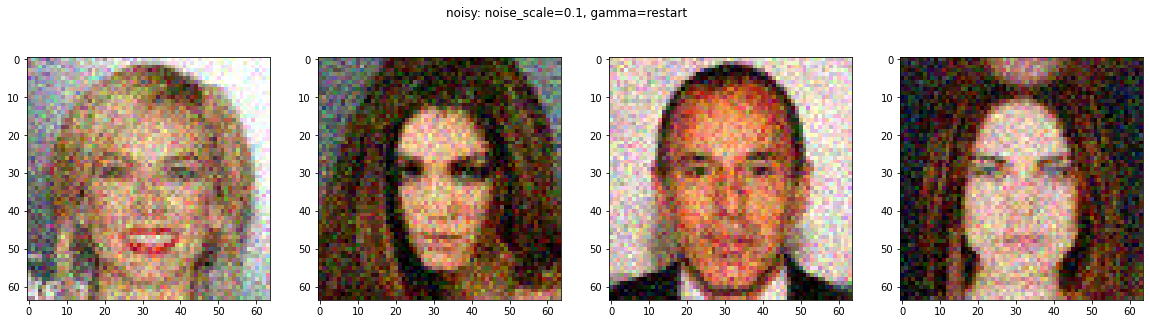

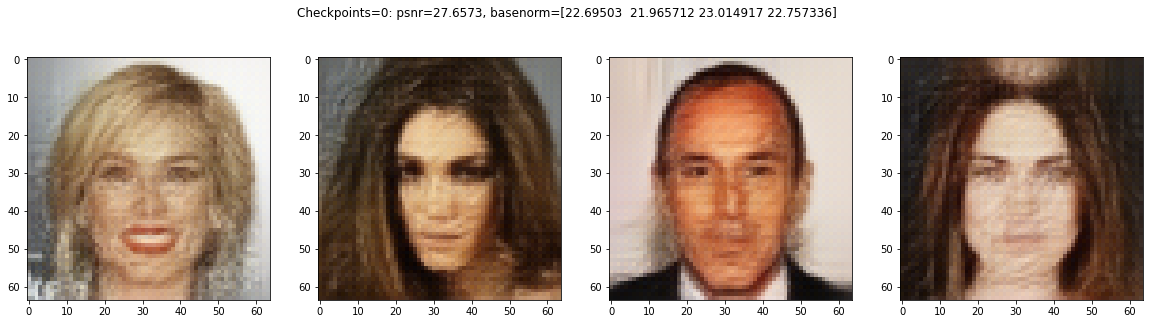

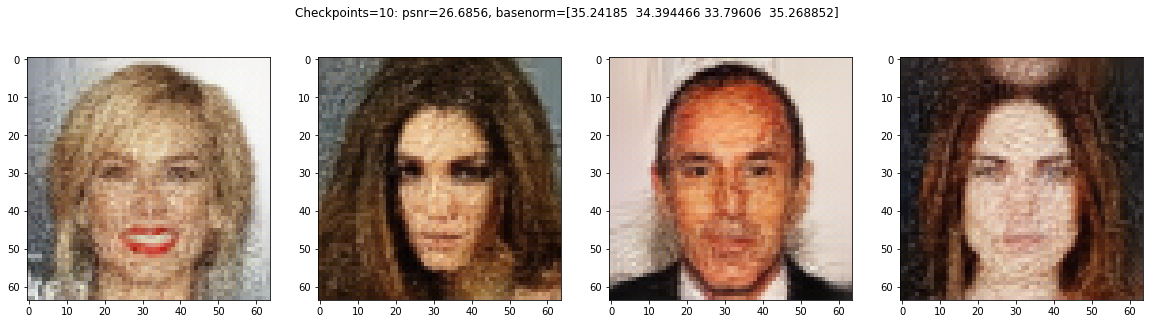

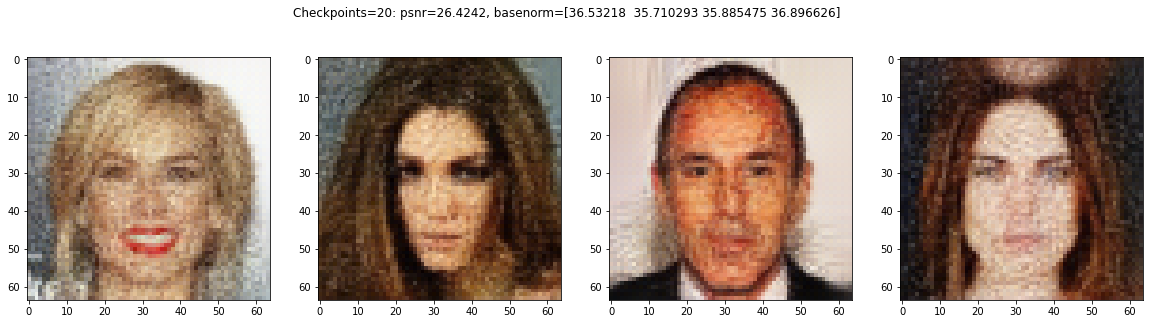

In [18]:
original_showed = False

for trial in results:
    gamma = trial.split('_')[5]
    noise_info = trial.split('_')[1]
    noise_loc, noise_scale = noise_info.split('#')
    noise, noisy, original, base_noisy, base_original, recovered_cps, base_cps, residual_curve, psnr_curve = load_trained(trial)
    print(f'noise_scale={noise_scale}, gamma={gamma}, basenorm_original={l2norm(base_original)}, basenorm_noisy={l2norm(base_noisy)}')

    if len(recovered_cps) > 0 and len(base_cps) > 0:
#         print(f'noise_scale={noise_scale}, gamma={gamma}, basenorm_original={l2norm(base_original)}, basenorm_noisy={l2norm(base_noisy)}')
        if not original_showed:
            fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
            for ori, ax in zip(original, axes):
                ax.imshow(ori.transpose(0, 1, 2))
            _ = plt.suptitle(f'original')
            _ = plt.show()
            original_showed = True
            
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
        _ = ax1.plot(residual_curve)
        _ = ax1.set_title(f'loss: noise_scale={noise_scale}, gamma={gamma}')

        _ = ax2.plot(psnr_curve)
        _ = ax2.set_title(f'psnr: noise_scale={noise_scale}, gamma={gamma}, maximum at={np.argmax(psnr_curve)}')
        _ = plt.show()
        
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
        for noisy, ax in zip(noisy, axes):
            ax.imshow(noisy.transpose(0, 1, 2))
        _ = plt.suptitle(f'noisy: noise_scale={noise_scale}, gamma={gamma}')
        _ = plt.show()
    
        recovered_cps.sort(key=lambda h: int(h.split('_')[-1].replace('.npy', '')))
        for recovered, base in zip(recovered_cps, base_cps):
            checkpoints = recovered.split('_')[-1].replace('.npy', '')
            recovered = np.load(recovered)
            base = np.load(base)
            
            psnr = [compare_psnr(x, y) for x,y in zip(original, recovered)]
            fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
            for recover, ax in zip(recovered, axes):
                ax.imshow(recover.transpose(0, 1, 2))
            _ = plt.suptitle(f'Checkpoints={checkpoints}: psnr={np.mean(psnr):.4f}, basenorm={l2norm(base)}')
            _ = plt.show()
    else:
        print('Failed')
    print('\n' * 3)
        
    

In [19]:
np.load(recovered_cps[0])[0]

array([[[0.5948432 , 0.5997778 , 0.59944713],
        [0.59371936, 0.6000311 , 0.6176779 ],
        [0.6043251 , 0.6133754 , 0.60804206],
        ...,
        [0.9628962 , 0.9512222 , 0.9494338 ],
        [0.96056175, 0.9520535 , 0.94121724],
        [0.9614714 , 0.9533936 , 0.9492221 ]],

       [[0.5857952 , 0.5966674 , 0.60970527],
        [0.5943196 , 0.60646504, 0.62123185],
        [0.5942878 , 0.60997593, 0.61663985],
        ...,
        [0.9619421 , 0.9569745 , 0.953383  ],
        [0.9560944 , 0.95357627, 0.94501704],
        [0.9597471 , 0.95373714, 0.94813687]],

       [[0.5962397 , 0.60509384, 0.60105324],
        [0.5902569 , 0.5972074 , 0.61577684],
        [0.6061466 , 0.61632097, 0.60527855],
        ...,
        [0.96226746, 0.9542756 , 0.95356846],
        [0.96530414, 0.9579136 , 0.9433959 ],
        [0.9625722 , 0.95161915, 0.9481442 ]],

       ...,

       [[0.81011415, 0.8248209 , 0.83944404],
        [0.81176704, 0.8356011 , 0.8519578 ],
        [0.8239038 , 0

In [20]:
np.load(recovered_cps[1])[0]

array([[[0.5774153 , 0.58638525, 0.6019708 ],
        [0.58425707, 0.60147953, 0.6413531 ],
        [0.5987876 , 0.6222743 , 0.63551617],
        ...,
        [0.9675461 , 0.955022  , 0.9582153 ],
        [0.9649954 , 0.9568981 , 0.9491014 ],
        [0.9659482 , 0.95844746, 0.9580892 ]],

       [[0.5642496 , 0.5839528 , 0.617461  ],
        [0.5775965 , 0.60509396, 0.63794184],
        [0.5830143 , 0.6142329 , 0.6431249 ],
        ...,
        [0.9660784 , 0.9618722 , 0.96218973],
        [0.9602072 , 0.9582093 , 0.95284694],
        [0.9644927 , 0.95887434, 0.95633155]],

       [[0.57939017, 0.59519243, 0.610383  ],
        [0.5773252 , 0.58885896, 0.63249075],
        [0.59896135, 0.61548525, 0.623301  ],
        ...,
        [0.9660915 , 0.95799077, 0.96204126],
        [0.9693755 , 0.96230555, 0.9505209 ],
        [0.96618676, 0.95612216, 0.9561438 ]],

       ...,

       [[0.8185216 , 0.82449317, 0.8305673 ],
        [0.8515533 , 0.8735932 , 0.8854856 ],
        [0.84533453, 0

97